# Image Kernels

This notebook shows the different image kernels and the concept of convolution

In [74]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Convolution

It's literally peer pressure

In [75]:
from IPython.display import HTML
HTML('<img alt="convolution" src="images/kernel.gif">')

## Display the original image

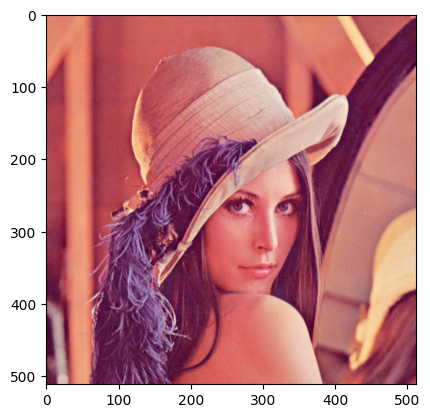

In [76]:
img = cv2.imread("./images/lenna.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Let's do monochrome

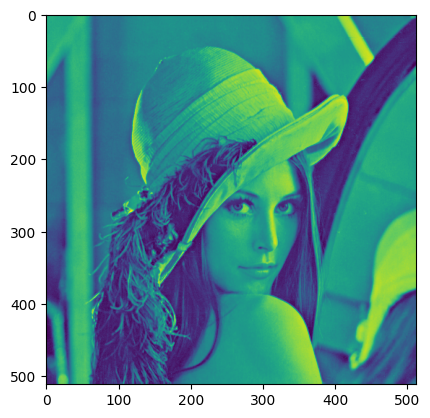

In [77]:
mono_img = cv2.imread("./images/lenna.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(mono_img)
plt.show()

In [78]:
mono_img.shape

(512, 512)

## Kernels

[Kernels taken from here](https://en.wikipedia.org/wiki/Kernel_(image_processing))

In [79]:
identity_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
blur_kernel = np.ones((3, 3)) / 9
ridge_kernel = np.array([[0, -1, 0], [-1, 4, 1], [0, -1, 0]])
edge_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
gaussian_blur_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
kernel_map = {
    "Identity": identity_kernel,
    "Box Blur": blur_kernel,
    "Gaussian Blur": gaussian_blur_kernel,
    "Edge Detection": edge_kernel,
    "Ridge Detection": ridge_kernel,
    "Sharpen": sharpen_kernel
}

## Multi channel image convolution

In [80]:
from scipy import ndimage

In [81]:
def convolve_multichannel(image, kernel):
    final_image_multichannel = np.zeros_like(image)
    for channel in range(3):
        final_image_multichannel[:, :, channel] = ndimage.convolve(image[:, :, channel], kernel, mode='constant')
    return final_image_multichannel

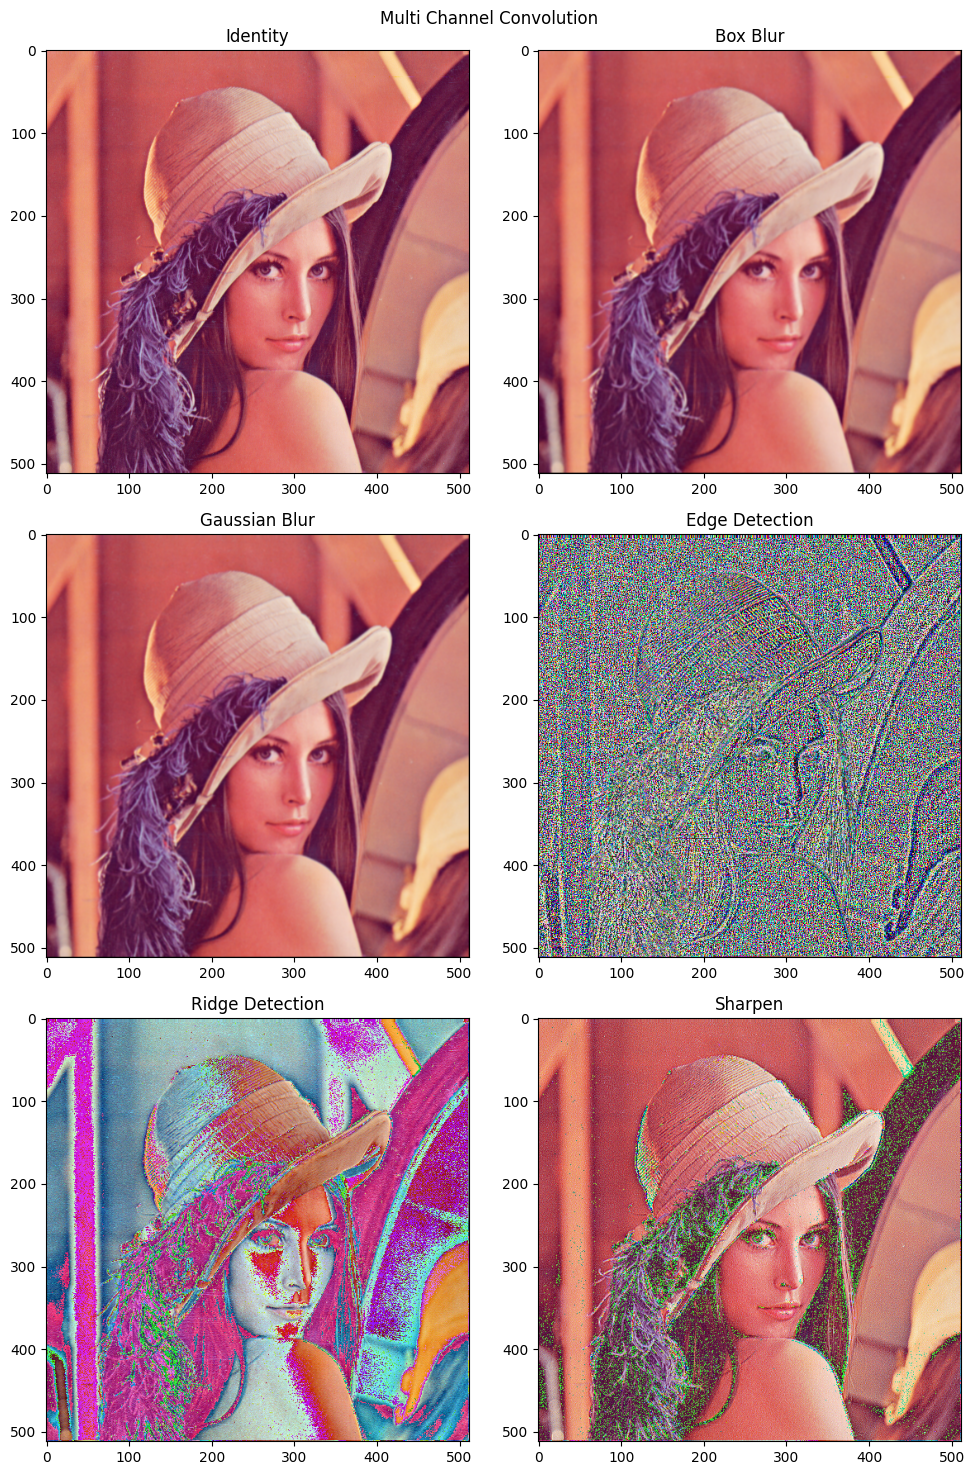

In [82]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))  # Create subplots with 3 rows and 2 columns

for (title, kernel), ax in zip(kernel_map.items(), axes.flatten()):
    ax.set_title(title)
    ax.imshow(cv2.cvtColor(convolve_multichannel(img, kernel), cv2.COLOR_BGR2RGB))    

fig.suptitle('Multi Channel Convolution')
plt.tight_layout()  # Adjust the subplots to prevent overlap
plt.show()  # Show the plot

## Single channel image convolution

In [83]:
def convolve_single_channel(image, kernel):
    final_image_single_channel = np.zeros_like(image)
    final_image_single_channel = ndimage.convolve(image, kernel, mode='constant')
    return final_image_single_channel

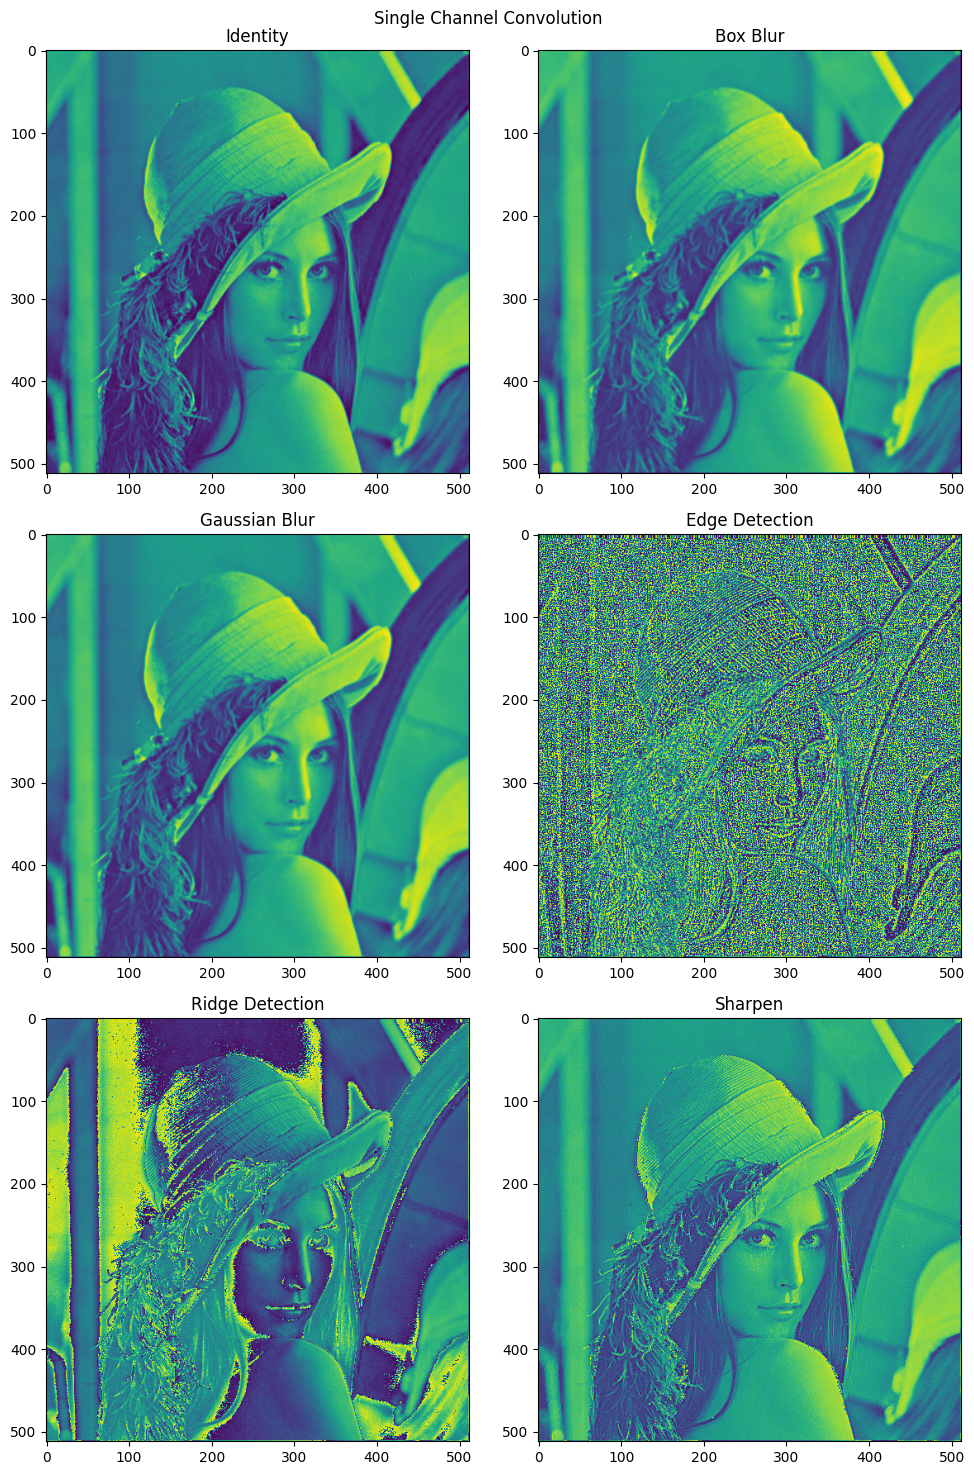

In [84]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))  # Create subplots with 3 rows and 2 columns

for (title, kernel), ax in zip(kernel_map.items(), axes.flatten()):
    ax.set_title(title)
    ax.imshow(convolve_single_channel(mono_img, kernel))

fig.suptitle('Single Channel Convolution')
plt.tight_layout()  # Adjust the subplots to prevent overlap
plt.show()  # Show the plot